# Question 1: CNN using Tensorflow

1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='coarse')
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

169001437/169001437 [==============================] - 13s 0us/step


2. Check if there are 20 labels in y_train using np.unique().

In [ ]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices",
"household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]

<ipython-input-3-54d9308d4308>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i+1)
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


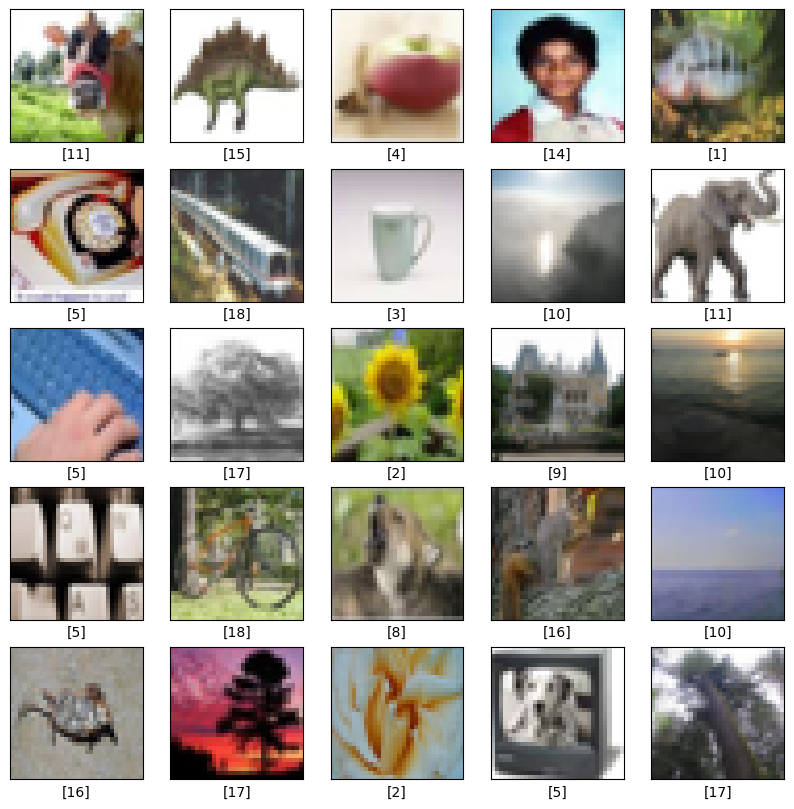

In [ ]:
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(x_train[i])
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        # plt.title(labels[i])
        # plt.imshow(data[i])
    #plt.tight_layout()
    plt.show()


show_samples(x_train, y_train)

<ipython-input-3-54d9308d4308>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i+1)


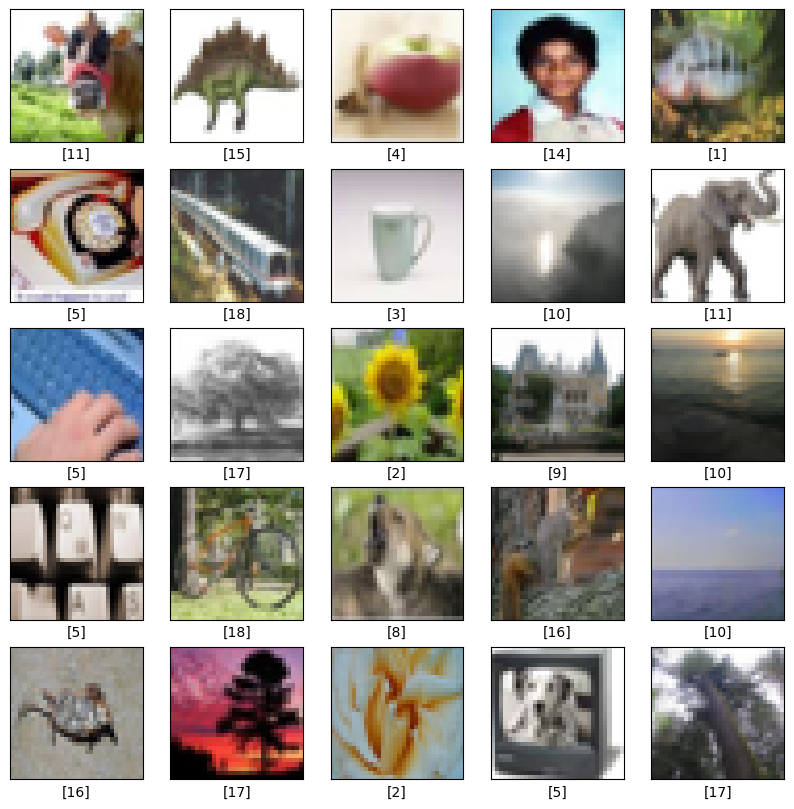

In [ ]:
show_samples(x_test,y_test)

Import layers and models from tensorflow.keras and build a Sequential Model with Convulation layers at the base and Fully Connected Layers at the top.

We used the same model in the Example Notebook for MNIST and achieved only 41% accuracy on the test data.

We then used the following architecture to achieve 45% accuracy on the test data:

1. Conv Layer : 32 filters each of 3x3.
2. Conv Layer : 64 filters each of 3x3.
3. Max pool layer of 2x2 kernel size.
4. Conv Layer : 64 filters each of 2x2.
5. Conv Layer : 64 filters each of 2x2.
6. Max pool layer of 2x2 kernel size.
7. Flatten.
8. Dense of 80 neurons.
9. Dense of 50 neurons.
10. Dense of 20 neurons.

To train this, it required 40 minutes with CPU. With GPU, took less than a minute !!

You should come up with your own architecture.

In [ ]:
from keras import layers
from keras import models

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu',
                  input_shape = (32,32,3)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,(2,2),activation = 'relu'),
    layers.Conv2D(64,(2,2),activation = 'relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(80, activation = 'relu'),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(100)

])

model.compile(optimizer='adam',
              #loss = tf.keras.losses.MeanAbsoluteError(),
              #metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        8224      
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [ ]:
history = model.fit(x_train,y_train,epochs = 8)

Epoch 1/8
1563/1563 [==============================] - 21s 5ms/step - loss: 2.5915 - accuracy: 0.2219
Epoch 2/8
1563/1563 [==============================] - 7s 5ms/step - loss: 2.1514 - accuracy: 0.3362
Epoch 3/8
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9936 - accuracy: 0.3852
Epoch 4/8
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8776 - accuracy: 0.4193
Epoch 5/8
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7886 - accuracy: 0.4442
Epoch 6/8
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7215 - accuracy: 0.4626
Epoch 7/8
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6500 - accuracy: 0.4847
Epoch 8/8
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5975 - accuracy: 0.4967


Plot the training accuracy vs number of epochs graph. Print the test accuracy.

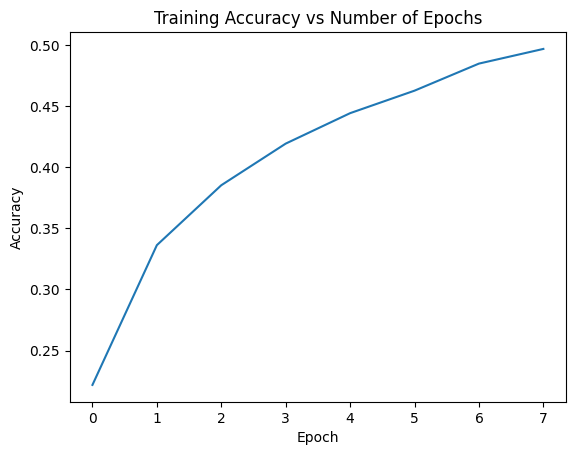

313/313 [==============================] - 1s 4ms/step - loss: 1.9117 - accuracy: 0.4199
Test Accuracy: 0.41990000009536743


In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy vs Number of Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Evaluating the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_accuracy)

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models. The top models are of transformers. We can check the ResNet-18 model. It consists of 18 layers. The architecture could be in the internet. Use ChatGPT if necessary.

The layers are :

1. Conv layer : 64 kernels, 7x7 . strides = (2,2). activation =none.
2. Batch Normalization.
3. Relu Activation.
4. MaxPooling 3x3 . stride =2x2.
5. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none.
6. Batch Normalization.
7. Relu Activation.
8. Same as 5 but 128 kernels.
9. Batch Normalization.
10. Relu Activation.
11. Same as 5 but 256 kernels.
12. Batch Normalization.
13. Relu Activation.
14. Same as 5 but 512 kernels.
15. Batch Normalization.
16. Relu Activation.
17. Global Average Pooling.
18. Dense layer of 20 neurons.


It overfitted my training data (84% accuracy) and gave 51% accuracy in test data. Can you do better?


In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Add, Flatten, Dense,GlobalAveragePooling2D
from keras.models import Model

In [ ]:
def layer_18(input_tensor):
  x = Conv2D(64,(7,7),strides = (2,2))(input_tensor)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
  x = Conv2D(64,(3,3),strides = (1,1))
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(128,(3,3),strides = (1,1))
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(256,(3,3),strides = (1,1))
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(512,(3,3),strides = (1,1))
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = GlobalAveragePooling2D()(x)
  x = Dense(20)(x)

  model = Model(inputs = input_tensor,outputs = x)
  return model


In [ ]:
def layer_18(input_tensor):
    x = Conv2D(64, (7, 7), strides=(2, 2))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = Conv2D(64, (3, 3), strides=(1, 1))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), strides=(1, 1))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), strides=(1, 1))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), strides=(1, 1))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(20)(x)

    model = Model(inputs=input_tensor, outputs=x)
    return model

In [ ]:
input_shape = (32,32,3)
input_tensor = Input(shape=input_shape)
model = layer_18(input_shape)
model.summary()

ValueError: ignored